In [33]:
import os
import requests
import numpy as np

In [1]:
def download_data(url, save_folder):
    # Ensure the save folder exists
    os.makedirs(save_folder, exist_ok=True)

    # Extract the filename from the URL
    filename = os.path.basename(url)
    file_path = os.path.join(save_folder, filename)

    # Download the data
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Save the file
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Data saved to {file_path}")

In [4]:
# download data
url = "https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DATA/temperature/shape/B5C2/0.25/woa23_B5C2_t00mn04_shape.tar.gz"  
save_folder = "data/"
download_data(url, save_folder)

Data saved to data/woa23_B5C2_t00mn04_shape.tar.gz


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [56]:
# read file, clean up columns and remove outliers
ocean_temp = gpd.read_file('data/woa23_B5C2_t00mn04_shape/')
ocean_temp.columns = ocean_temp.columns.str.lower()
ocean_temp_clean = ocean_temp[ocean_temp['surface']>-100].loc[:,['surface','geometry']]

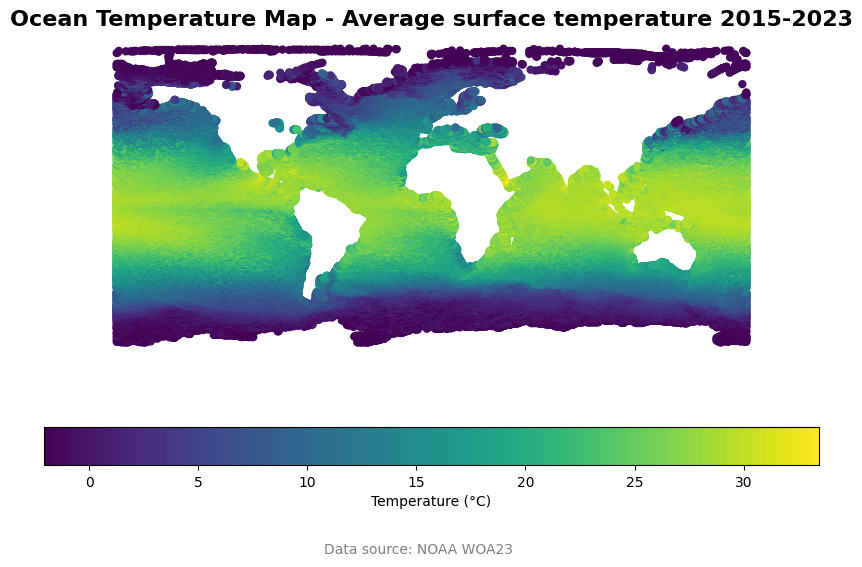

In [60]:
# plot
f, ax = plt.subplots(1,1,figsize = (10,6))

ocean_temp_clean.plot(ax=ax, column='surface', cmap='viridis', linewidth=0, edgecolor='none', legend=True,
                      legend_kwds={'label': "Temperature (°C)", 'orientation': "horizontal"})

ax.axis('off')
# map title
ax.set_title("Ocean Temperature Map - Average surface temperature 2015-2023", fontsize=16, fontweight='bold')
# Captions
f.text(0.5, 0.02, "Data source: NOAA WOA23", ha='center', va='center', fontsize=10, color='gray')
# Save the map as a PNG file
plt.savefig('ocean_temperature_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

<Figure size 640x480 with 0 Axes>

<Axes: >

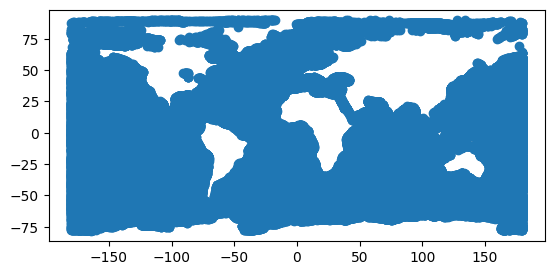

In [11]:
ocean_temp.